# 線形モデルを題材として学習について学ぶ

In [1]:
import random
import numpy as np
import matplotlib.pyplot as plt

In [2]:
SEED = 0xcafe
random.seed(SEED)
np.random.seed(SEED)

In [3]:
def plot_option(ax, xlim, ylim, equal_aspect=True, grid=True):
    ax.set_xlim(*xlim)
    ax.set_ylim(*ylim)
    if equal_aspect:
        ax.set_aspect('equal')
    if grid:
        ax.grid()

[1. 2. 3.] [1.1512539  1.84935124 2.94235408]


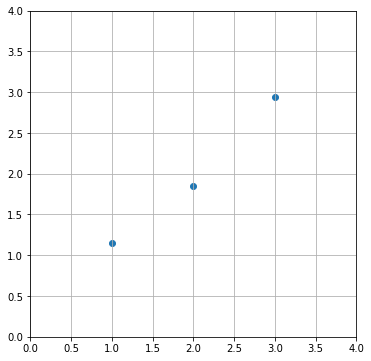

In [4]:
X = np.arange(1, 4).astype(float)
Y = np.random.normal(X, 0.2)
print(X, Y)

fig, ax = plt.subplots(1, 1, figsize=(6, 6))
ax.scatter(X, Y)
plot_option(ax, (0, 4), (0, 4))
plt.show()

線形モデル $y = f(x; {\bf{w}})$
$$
f(x;{\bf{w}}) = w_0 + w_1 x
$$
として重み ${\bf{w}} = [w_0, w_1]^\top$ を求める．

$x_0 = 1, x_1 = x$ として縦ベクトル ${\bf{x}} = [x_0, x_1]^\top$ を考えると
$$
\begin{align}
f({\bf{x}}; {\bf{w}})
&= x_0 w_0 + x_1 w_1 \\
&= [x_0, x_1]
\left[\begin{array}{c}
w_0 \\
w_1
\end{array}\right] \\
&= {\bf{x}}^\top {\bf{w}}
\end{align}
$$
と表現できる．

In [5]:
def linear_model(w):
    """重みが `w` の線形モデルの作成"""
    return lambda x: w[0] + w[1] * x

# 単回帰分析

$$
\begin{align}
w_1 &= \frac{Cov[X, Y]}{Var[X]} \\
w_0 &= \mu_y - w_1 \mu_x
\end{align}
$$

NOTE: 何かおかしい気がする．

In [6]:
np.cov(X, Y), np.var(X), np.var(Y)

(array([[1.        , 0.89555009],
        [0.89555009, 0.81500583]]),
 0.6666666666666666,
 0.5433372214465426)

In [7]:
W = np.zeros(2)
W[1] = np.cov(X, Y)[0, 1] / np.var(X)
W[0] = np.mean(Y) - W[1] * np.mean(X)
W

array([-0.70566387,  1.34332514])

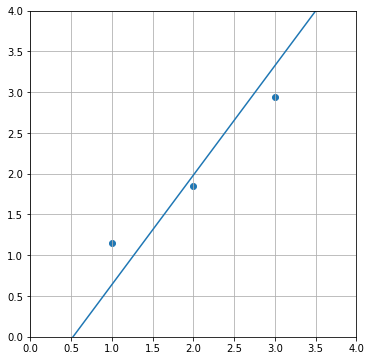

In [8]:
x = np.arange(5)
fig, ax = plt.subplots(1, 1, figsize=(6, 6))
ax.scatter(X, Y)
ax.plot(x, linear_model(W)(x))
plot_option(ax, (0, 4), (0, 4))
plt.show()

# 線形モデルの重みを求める

## 厳密に求める

$i$ 番目のデータの予測値を
$$
\hat{y}_i = {\bf x}_i^\top {\bf w}
$$
と置く．すべての予測値を行列で表すと
$$
\left[\begin{array}{c}\hat{y}_1 \\ \hat{y}_2 \\ \vdots \\ \hat{y}_N\end{array}\right] = 
\left[\begin{array}{c}
{\bf x}_1^\mathrm{T} \\ {\bf x}_2^\mathrm{T} \\ \vdots \\ {\bf x}_N^\mathrm{T}
\end{array}\right] {\bf w}
$$
を表せられて，これを
$$
\hat{{\bf y}} = X{\bf w}
$$
と表す．

二乗誤差 $l(y, \hat{y}) = (y - \hat{y})^2$ を用いて，
損失関数 $L({\bf{w}})$ は
$$
\begin{align}
L({\bf{w}}) &= \sum_{i=1}^N l(y_i, \hat{y}_i) \\
&= \sum_{i=1}^N (y_i - \hat{y}_i)^2 \\
&= \left[\begin{array}{cccc}y_1-\hat{y}_1 & y_2-\hat{y}_2 & \dots & y_n-\hat{y}_n\end{array}\right]
\left[\begin{array}{c}
y_1 - \hat{y}_1 \\
y_2 - \hat{y}_2 \\
\vdots \\
y_n - \hat{y}_n
\end{array}\right] \\
&= ({\bf y} - \hat{{\bf y}})^\top({\bf y} - \hat{{\bf y}}) \\
&= ({\bf y} - X{\bf w})^\top({\bf y} - X{\bf w}) \\
&= ({\bf y}^\top - {\bf w}^\top X^\top)({\bf y} - X{\bf w}) \\
&= {\bf y}^\top {\bf y} - {\bf w}^\top X^\top {\bf y} - {\bf y}^\top X{\bf w} + {\bf w}^\top X^\top X{\bf w} \\
&= {\bf y}^\top {\bf y} - 2{\bf y}^\top X{\bf w} + {\bf w}^\top X^\top X{\bf w}
\end{align}
$$
${\bf w}^\top X^\top {\bf y}$ と ${\bf y}^\top X{\bf w}$ はスカラー値．
これを ${\bf{w}}$ で偏微分して
$$
\frac{\partial L({\bf w})}{\partial {\bf w}}
= 2X^\top X{\bf w} - 2X^\top{\bf y}
$$
$\nabla_{\bf x} {\bf b}^\top{\bf x} = {\bf b}$，$\nabla_{\bf x} {\bf x}^\top A{\bf x} = 2A{\bf x}$ となることを利用．詳しくはパターン認識の講義を参照．
$\frac{\partial L({\bf w})}{\partial {\bf w}}=0$ となるときの ${\bf{w}}$ を求める．
$$
{\bf{w}} = (X^\top X)^{-1} X^\top {\bf y}
$$

ただし，$X^\top X$ が正方行列であり，逆行列が存在する必要がある．
$X^\top X$ の逆行列が存在しない場合は多重共線性問題となる（？）

In [9]:
x, y = X.reshape(-1, 1), Y.reshape(-1, 1)
x = np.concatenate([np.ones_like(x), x], axis=1)

In [10]:
W = np.linalg.inv(x.T @ x) @ x.T @ y
W

array([[0.18988622],
       [0.89555009]])

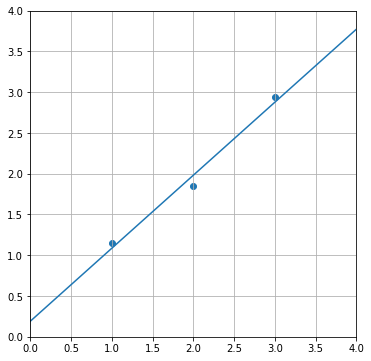

In [11]:
x_range = np.arange(5)
fig, ax = plt.subplots(1, 1, figsize=(6, 6))
ax.scatter(X, Y)
ax.plot(x_range, linear_model(W)(x_range))
plot_option(ax, (0, 4), (0, 4))
plt.show()

## （バッチ）勾配降下法

パラメータ $\theta$ に対するコスト関数 $J(\theta)$ とする．
学習率を $\alpha$ として，$\tau$ ステップから次のステップへの更新は下の通り．

$$
\theta^{\tau+1} = \theta^{\tau} - \alpha \nabla J(\theta^{\tau})
$$

二乗誤差 $l(y, \hat{y}) = (y - \hat{y})^2$ を用いて，
損失関数 $L({\bf w})$ は
$$
\begin{align}
L({\bf{w}})
&= \sum_{i=1}^N l(y_i, \hat{y}_i) \\
&= \sum_{i=1}^N (y_i - (w_0 + w_1 x_i))^2
\end{align}
$$

In [17]:
def L(w_0, w_1):
    return np.sum((Y - (w_0 + w_1 * X))**2)

In [18]:
def gradient(f):
    h = 1e-8
    return lambda x: (f(x + h) - f(x)) / h

In [24]:
def nabla_2d(f):
    def _ret(x, y):
        dx = gradient(lambda x: f(x, y))
        dy = gradient(lambda y: f(x, y))
        return dx(x), dy(y)
    return _ret

In [28]:
# 初期値
w_0, w_1 = 1., 1.
α = 0.001

nabla_L = nabla_2d(L)
for _ in range(10000):
    dw = nabla_L(w_0, w_1)
    w_0 = w_0 - α * dw[0]
    w_1 = w_1 - α * dw[1]
    
W = np.array([w_0, w_1]).reshape(-1, 1)
W

array([[0.19035744],
       [0.8953428 ]])

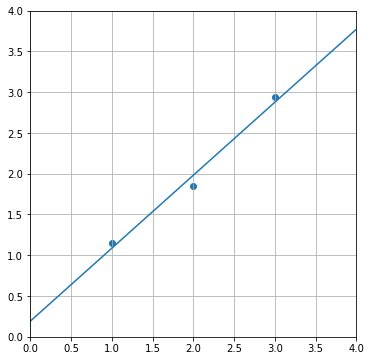

In [29]:
x_range = np.arange(5)
fig, ax = plt.subplots(1, 1, figsize=(6, 6))
ax.scatter(X, Y)
ax.plot(x_range, linear_model(W)(x_range))
plot_option(ax, (0, 4), (0, 4))
plt.show()

# 最尤推定

$$
\theta^* = \mathrm{arg}\max_{\theta} p(X|\theta)
$$

誤差が平均 $0$，分散 $\sigma$ の正規分布に従うとする．
このときの尤度関数は $l(\theta) = \prod_{i=0}^N p(y_i|\theta_i)$ より，
負の対数尤度 $L(\theta) = -\log l(\theta)$ を考える．

$$
\begin{align}
L(\theta) &= -\log l(\theta) \\
&= -\log\prod_{i=0}^N p(y_i|\theta_i) \\
&= -\log\prod_{i=0}^N \frac{1}{\sqrt{2\pi\sigma^2}}\exp\left({-\frac{(y_i-f({\bf{x}};{\bf{w}}))^2}{2\sigma^2}}\right)
& (\because \theta_i = f({\bf{x}};{\bf{w}}))
\end{align}
$$

# MAP 推定

$p(\theta|X) = \frac{p(X|\theta)p(\theta)}{p(X)}$ より
$$
\begin{align}
\theta^*
&= \mathrm{arg}\max_{\theta} p(\theta|X) \\
&= \mathrm{arg}\max_{\theta} \frac{p(X|\theta)p(\theta)}{p(X)}
\end{align}
$$

# ベイズ推定

$$
p(\theta|X)
$$